# Teoria y Ejemplos

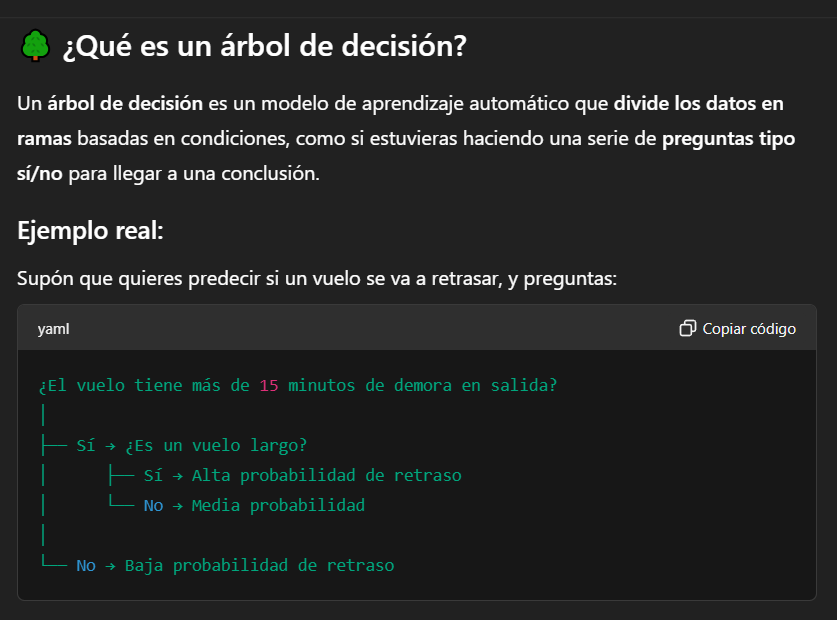

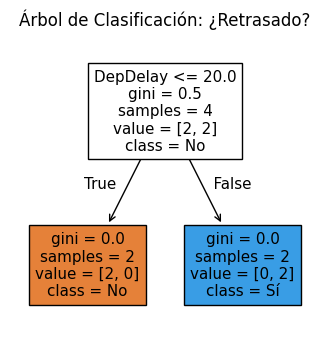

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    "DepDelay": [5, 30, 10, 45],
    "Distance": [500, 1000, 800, 1500],
    "Retrasado": [0, 1, 0, 1]
}

df = pd.DataFrame(data)
X = df[["DepDelay", "Distance"]]
Y = df["Retrasado"]

# Entrenar modelo de árbol
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, Y)

# Visualizar el árbol
plt.figure(figsize=(4,4))
plot_tree(tree, feature_names=X.columns, class_names=["No", "Sí"], filled=True)
plt.title("Árbol de Clasificación: ¿Retrasado?")
plt.show()

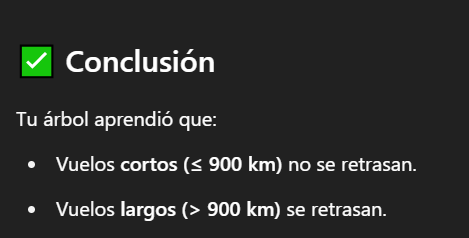

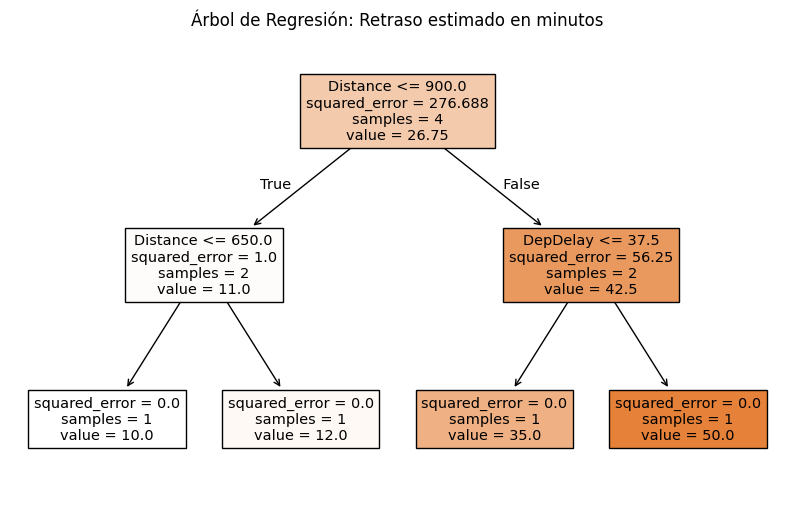

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Datos ficticios
data = {
    "DepDelay": [5, 30, 10, 45],
    "Distance": [500, 1000, 800, 1500],
    "ArrDelay": [10, 35, 12, 50]
}

df = pd.DataFrame(data)
X = df[["DepDelay", "Distance"]]
Y = df["ArrDelay"]

# Árbol de regresión
reg_tree = DecisionTreeRegressor(max_depth=3)
reg_tree.fit(X, Y)

# Graficar árbol
plt.figure(figsize=(10,6))
plot_tree(reg_tree, feature_names=X.columns, filled=True)
plt.title("Árbol de Regresión: Retraso estimado en minutos")
plt.show()

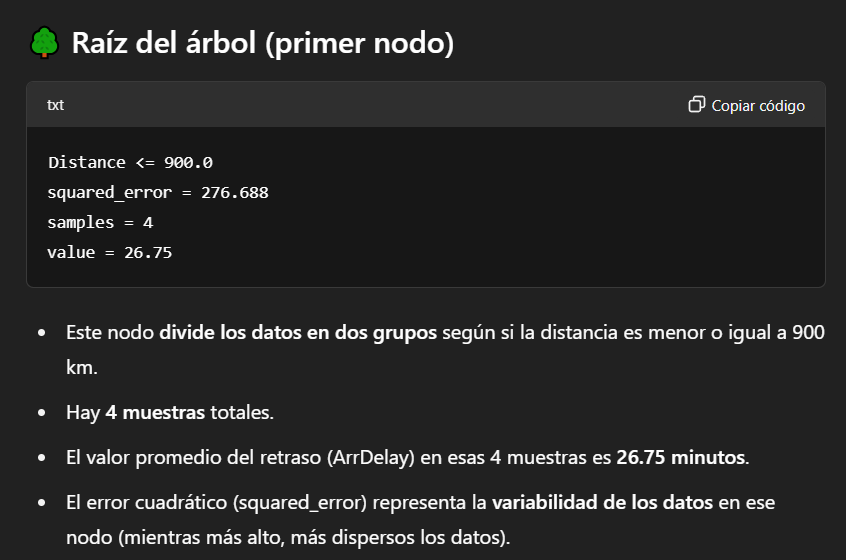
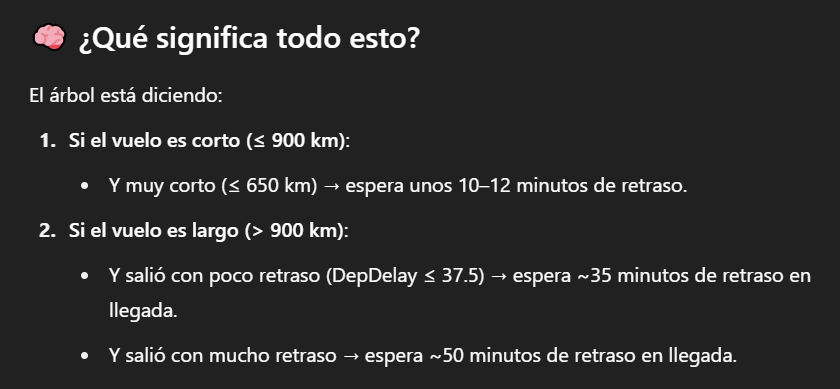

In [3]:
from sklearn import tree
import pandas as pd
import numpy as np  
from sklearn.metrics import r2_score

df = pd.read_csv(r"C:\Users\steve\OneDrive\Documentos\python\base_datos_2008.csv")
df = df.dropna(subset=["ArrDelay"])
df = df.sample(frac=1)
dftest = df.tail(500000) ## obtiene los ultimos 500,000 datos
df = df.head(500000) #obtiene en el df los primero 500,000 datos

In [12]:
clf = tree.DecisionTreeClassifier(max_depth=3) #Crea el arbol de clasificacion

X = df[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
X_test = dftest[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
Y = df["ArrDelay"] > 10
Y_test = dftest["ArrDelay"] > 10

clf = clf.fit(X,Y)
Y_pred = clf.predict(X)
Y_pred_test = clf.predict(X_test)



In [13]:
np.mean(Y == Y_pred)

np.float64(0.901392)

In [14]:
np.mean(Y_test == Y_pred_test)

np.float64(0.901822)

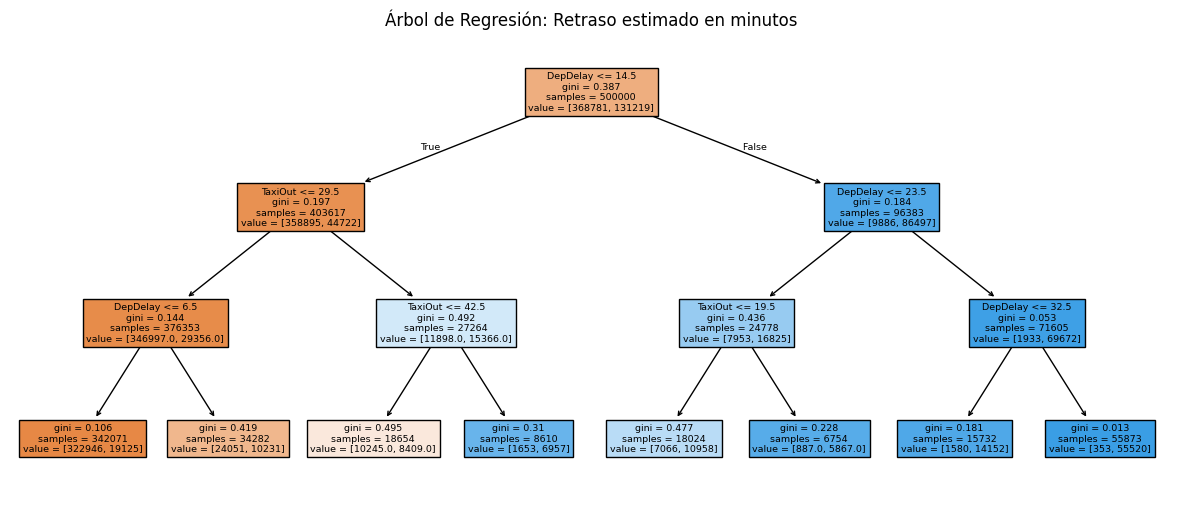

In [19]:
# Graficar árbol
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(15,6))
plot_tree(clf, feature_names=X.columns, filled=True)
plt.title("Árbol de Regresión: Retraso estimado en minutos")
plt.show()

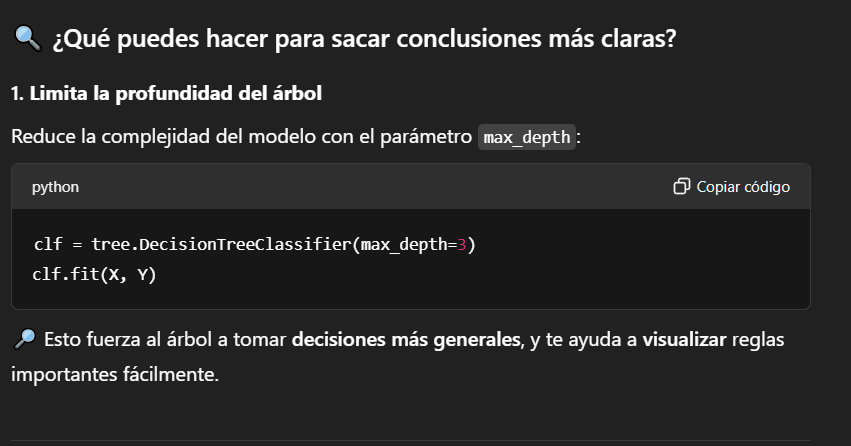
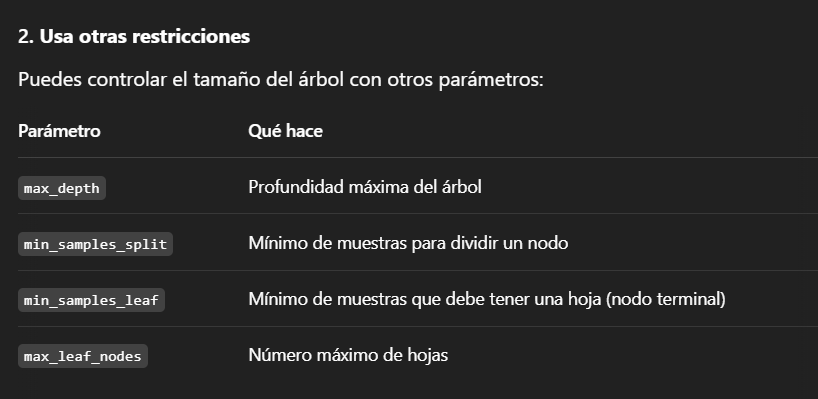

In [ ]:
pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False) # Esto te dice cuáles son las variables más influyentes para la decisión. 

DepDelay    0.879495
TaxiOut     0.120505
AirTime     0.000000
Distance    0.000000
TaxiIn      0.000000
DepTime     0.000000
dtype: float64

[Text(0.5, 0.875, 'DepDelay <= 14.5\ngini = 0.387\nsamples = 500000\nvalue = [368781, 131219]\nclass = No'),
 Text(0.25, 0.625, 'TaxiOut <= 29.5\ngini = 0.197\nsamples = 403617\nvalue = [358895, 44722]\nclass = No'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'DepDelay <= 6.5\ngini = 0.144\nsamples = 376353\nvalue = [346997.0, 29356.0]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.106\nsamples = 342071\nvalue = [322946, 19125]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.419\nsamples = 34282\nvalue = [24051, 10231]\nclass = No'),
 Text(0.375, 0.375, 'TaxiOut <= 42.5\ngini = 0.492\nsamples = 27264\nvalue = [11898.0, 15366.0]\nclass = Sí'),
 Text(0.3125, 0.125, 'gini = 0.495\nsamples = 18654\nvalue = [10245.0, 8409.0]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.31\nsamples = 8610\nvalue = [1653, 6957]\nclass = Sí'),
 Text(0.75, 0.625, 'DepDelay <= 23.5\ngini = 0.184\nsamples = 96383\nvalue = [9886, 86497]\nclass = Sí'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'TaxiOu

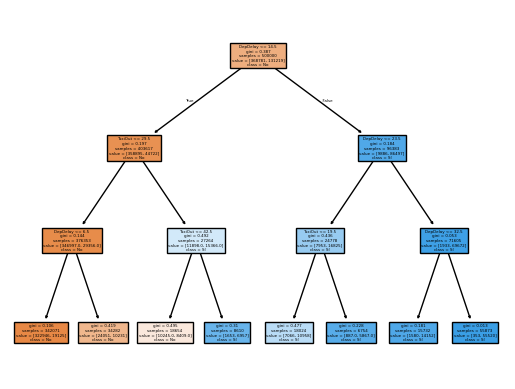

In [ ]:
tree.plot_tree(clf, max_depth=3, feature_names=X.columns, class_names=["No", "Sí"], filled=True) #Visualiza solo parte del codigo

In [22]:
clf = tree.DecisionTreeRegressor()

Y = df["ArrDelay"]
Y_test = dftest["ArrDelay"]

clf = clf.fit(X, Y)
Y_pred = clf.predict(X)
Y_pred_test = clf.predict(X_test)

print("R cuadrado: ", r2_score(Y, Y_pred))
print("R cuadrado test", r2_score(Y_test, Y_pred_test))

R cuadrado:  0.9999992894232292
R cuadrado test 0.8922145919911284


[Text(0.5, 0.875, 'DepDelay <= 61.5\nsquared_error = 1533.965\nsamples = 500000\nvalue = 8.151'),
 Text(0.25, 0.625, 'DepDelay <= 14.5\nsquared_error = 371.051\nsamples = 470540\nvalue = 1.039'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'TaxiOut <= 27.5\nsquared_error = 193.046\nsamples = 403617\nvalue = -3.77'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'DepDelay <= 34.5\nsquared_error = 463.769\nsamples = 66923\nvalue = 30.045'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'DepDelay <= 189.5\nsquared_error = 6395.9\nsamples = 29460\nvalue = 121.749'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'DepDelay <= 114.5\nsquared_error = 1508.839\nsamples = 26154\nvalue = 102.125'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'DepDelay <= 528.5\nsquared_error = 17909.527\nsamples = 3306\nvalue = 276.996'),
 Text(0.8

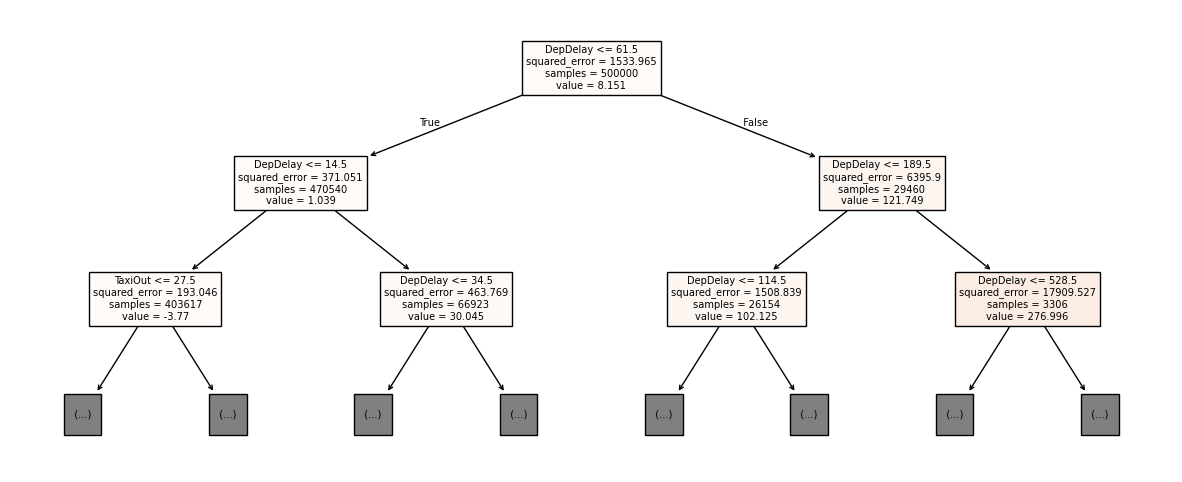

In [25]:
plt.figure(figsize=(15,6))
tree.plot_tree(clf, max_depth=2, feature_names=X.columns, class_names=["No", "Sí"], filled=True) #Visualiza solo parte del codigo

# Resumen 
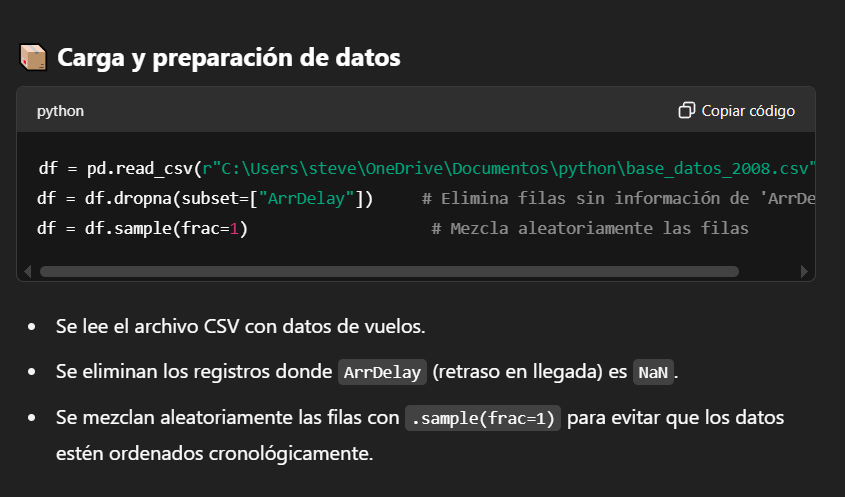
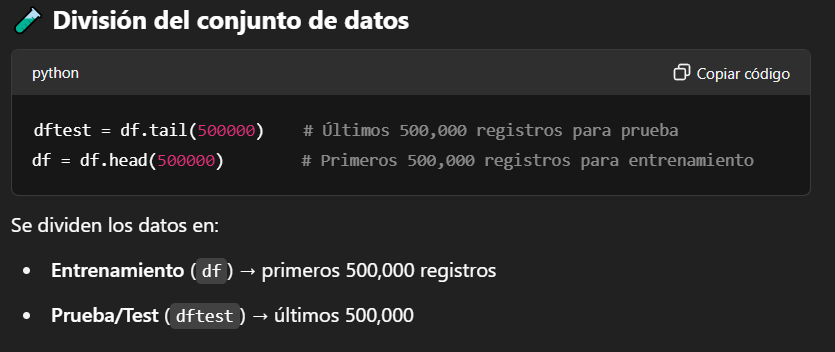
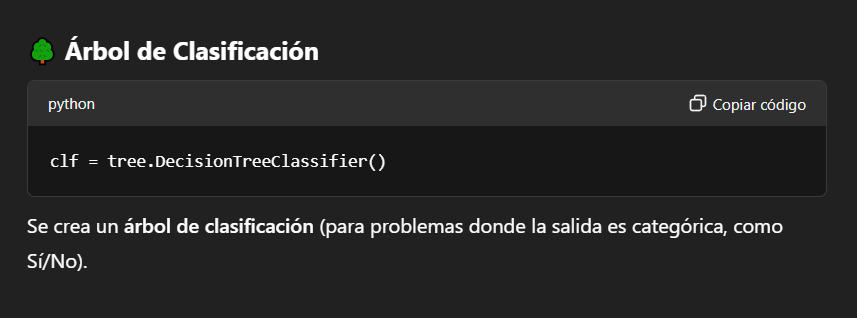
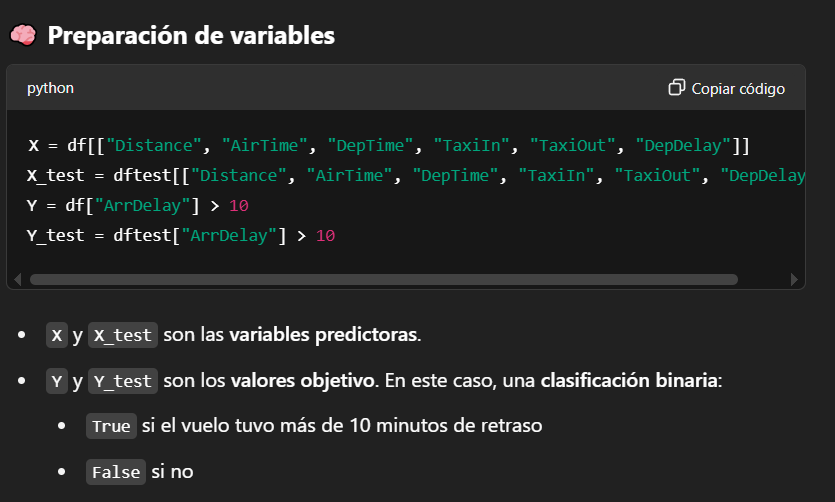
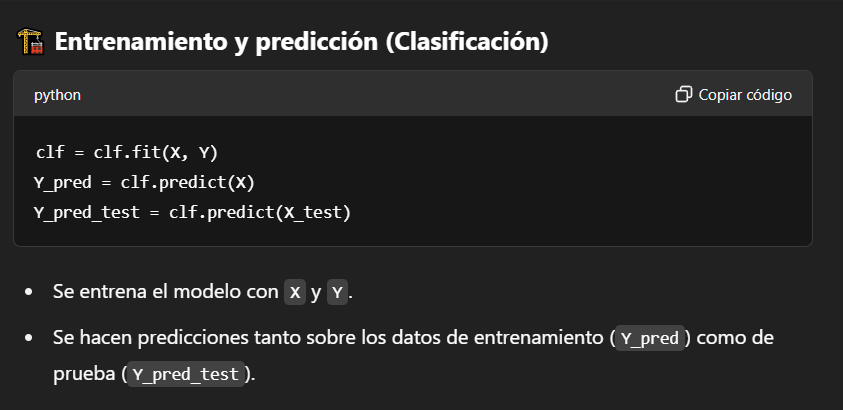
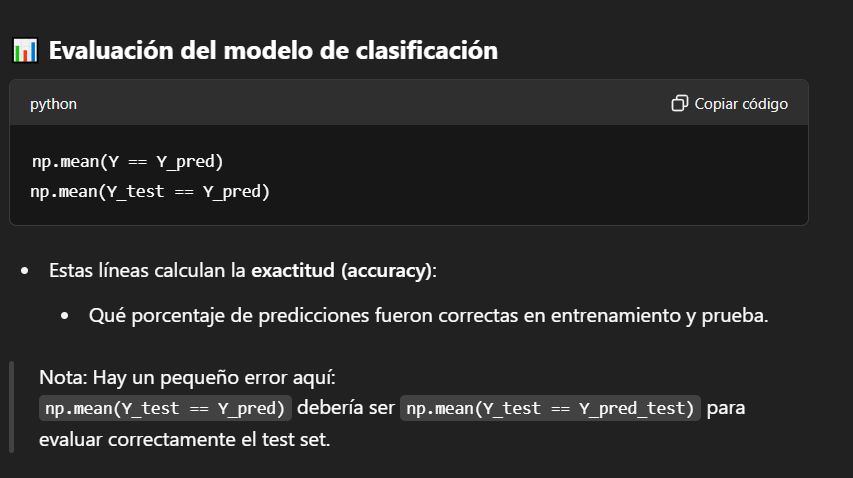
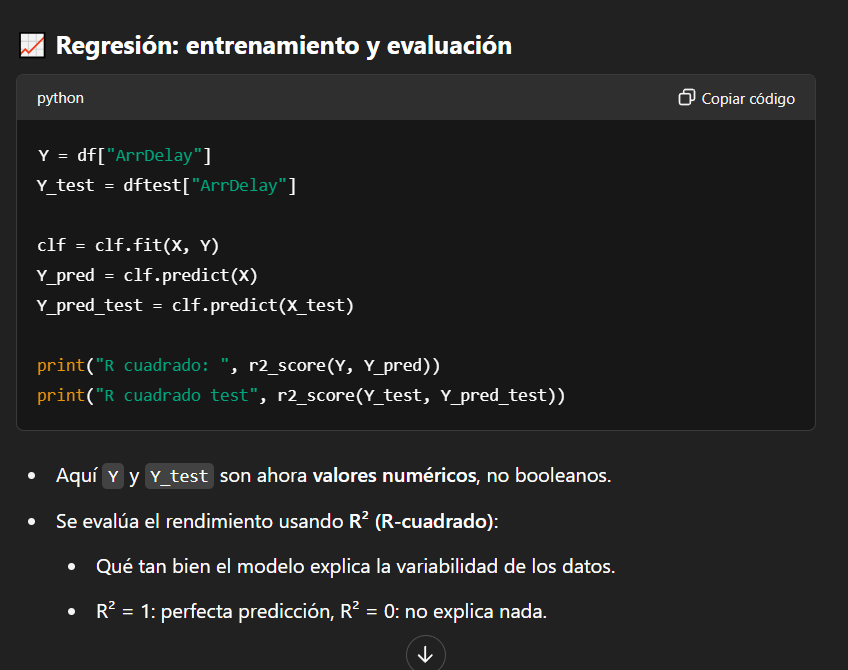
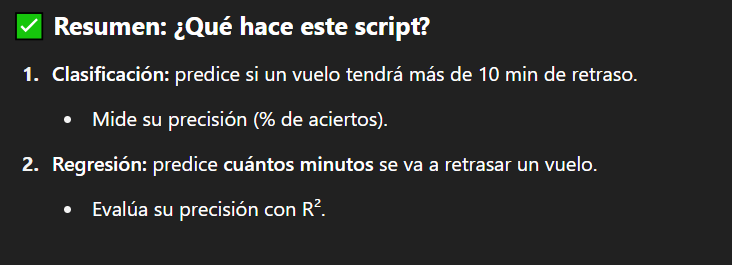